# Milestone 3 - Daniel Krasnov

---

## Research question/interests
Research Questions: 

1. Where will I find the best restaurants in India? 
1. Which city should I live in to have access to the most good restaurants?
1. Which city is the best on a budget?
1. Which city has the best rating to cost ratio?




# Task 1
## EDA

In [2]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import folium

#Read in data
zomatoCSV = pd.read_csv("..\\data\\raw\\zomato.csv" , encoding = "maclatin2") #TODO fix encoding
countryCodesCSV = pd.read_excel("..\\data\\raw\\Country-Code.xlsx")

In [3]:
#Inital preview of ZomatoCSV
print(f"Number of rows and columns:\n{zomatoCSV.shape}")
print(f"\nColumns:\n{zomatoCSV.columns}")
print(f"\nData frame summary: ")
print(zomatoCSV.info())

Number of rows and columns:
(9551, 21)

Columns:
Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

Data frame summary: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Loca

In [4]:
#Inital Preview of countryCodesCSV
print(f"Number of rows and columns:\n{countryCodesCSV.shape}")
print(f"\nColumns:\n{countryCodesCSV.columns}")
print(f"\nData frame summary: ")
print(countryCodesCSV.info())

Number of rows and columns:
(15, 2)

Columns:
Index(['Country Code', 'Country'], dtype='object')

Data frame summary: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Code  15 non-null     int64 
 1   Country       15 non-null     object
dtypes: int64(1), object(1)
memory usage: 368.0+ bytes
None


Preview looks good! Now I can go ahead and merge the two tables on the Country Code column

In [5]:
#Merge Tables
zomatoCSV = zomatoCSV.merge(countryCodesCSV, how = "inner",on = "Country Code")
zomatoCSV

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlŘĪ Gurme,208,ŘŃstanbul,"KemankeĀŰ Karamustafa PaĀŰa Mahallesi, RŘĪhtŘĪ...",KarakŪ_y,"KarakŪ_y, ŘŃstanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AŘŰacŘĪ,208,ŘŃstanbul,"KoĀŰuyolu Mahallesi, Muhittin ŪžstŪ_ndaŘŰ Cadd...",KoĀŰuyolu,"KoĀŰuyolu, ŘŃstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,ŘŃstanbul,"KuruŪ_eĀŰme Mahallesi, Muallim Naci Caddesi, N...",KuruŪ_eĀŰme,"KuruŪ_eĀŰme, ŘŃstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,AĀŰĀŰk Kahve,208,ŘŃstanbul,"KuruŪ_eĀŰme Mahallesi, Muallim Naci Caddesi, N...",KuruŪ_eĀŰme,"KuruŪ_eĀŰme, ŘŃstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey


All in all looks we a table of 9551 rows. Now I want to get sense of missing data. To do this I use code adapted from [Handling Missing Data for a Beginner](https://towardsdatascience.com/handling-missing-data-for-a-beginner-6d6f5ea53436)

In [6]:
zomatoCSV.isnull().any()

Restaurant ID           False
Restaurant Name         False
Country Code            False
City                    False
Address                 False
Locality                False
Locality Verbose        False
Longitude               False
Latitude                False
Cuisines                 True
Average Cost for two    False
Currency                False
Has Table booking       False
Has Online delivery     False
Is delivering now       False
Switch to order menu    False
Price range             False
Aggregate rating        False
Rating color            False
Rating text             False
Votes                   False
Country                 False
dtype: bool

Looks like there are missing values in Cuisines. Generating a heatmap will give us a better sense of the damage.

<AxesSubplot:>

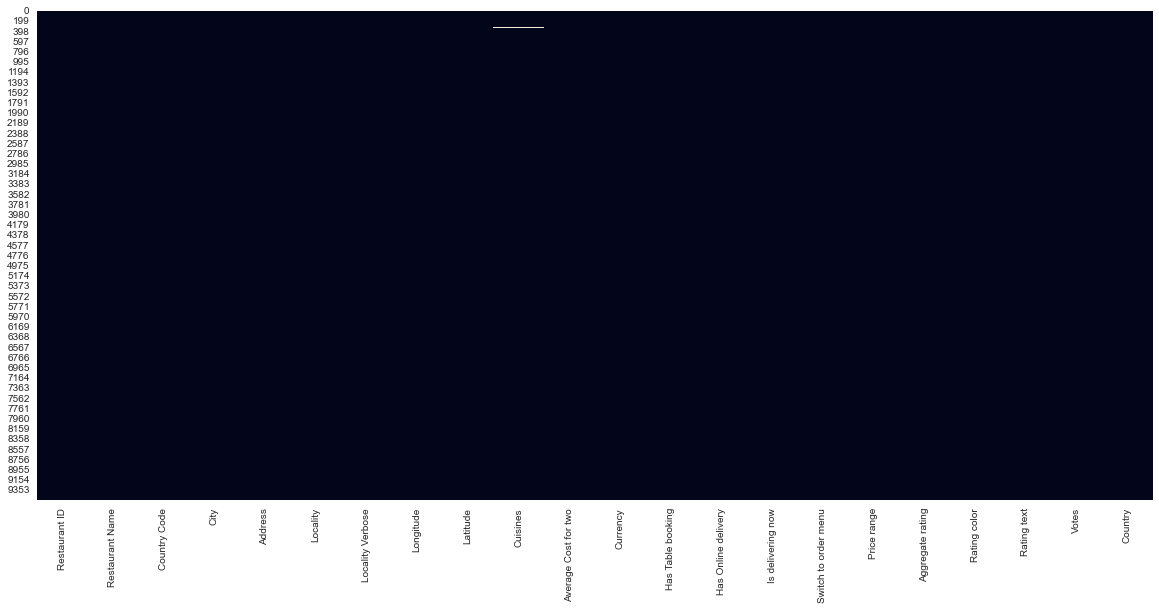

In [7]:
#Set window size
sns.set({'figure.figsize':(20,9)})
#Heatmap of null values
sns.heatmap(zomatoCSV.isnull(), cbar=False)

The amount of null data is very low maybe they use other values to represent missing data?

In [8]:
missing = zomatoCSV[(zomatoCSV['Rating text'].isin(["Not rated"])) == True]
missing[missing['Country'].isin(['India'])]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
871,9299,Aggarwal Sweet Corner,1,Faridabad,"Badarpur Border Chowk Post, Badarpur Border, F...",Badarpur Border,"Badarpur Border, Faridabad",77.302742,28.496292,Mithai,...,No,No,No,No,1,0.0,White,Not rated,1,India
872,9178,Kashyap Vaishno Dhaba,1,Faridabad,"Near Seble Cinema, Dharamveer Market, Badarpur...",Badarpur Border,"Badarpur Border, Faridabad",77.303542,28.495915,North Indian,...,No,No,No,No,1,0.0,White,Not rated,3,India
873,18477319,Total Food Court,1,Faridabad,"B-222, Shishram Complex, Main Market, Badarpur...",Badarpur Border,"Badarpur Border, Faridabad",0.000000,0.000000,"North Indian, Mughlai, Chinese",...,No,No,No,No,1,0.0,White,Not rated,3,India
874,18433852,The Chaiwalas,1,Faridabad,"Sector 21 A, Asian Hospital, Badhkal Chowk, Ba...",Badkal Lake,"Badkal Lake, Faridabad",77.300088,28.426284,Cafe,...,No,No,No,No,1,0.0,White,Not rated,0,India
878,18377449,Aapki Rasoi,1,Faridabad,"HR-227, 60 Feet Road, Pul Pehlad Pur, Charmwoo...",Charmwood Village,"Charmwood Village, Faridabad",77.291829,28.499064,North Indian,...,No,No,No,No,1,0.0,White,Not rated,1,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9103,18428504,The Hangout-Deli,1,Noida,"320-A, 3rd Floor, The Great India Place Mall, ...","The Great India Place, Sector 38","The Great India Place, Sector 38, Noida",77.323213,28.567751,"Continental, Lebanese, Mexican",...,Yes,No,No,No,3,0.0,White,Not rated,0,India
9109,18277023,Bread & Pasta,1,Noida,"Shop 15, Near HDFC Bank, Tulip Mall, Sector 48...","Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida, Noida",77.367303,28.557929,Fast Food,...,No,No,No,No,1,0.0,White,Not rated,1,India
9110,18313203,Chillies Cafe,1,Noida,"G-11, Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida, Noida",77.367188,28.557842,Fast Food,...,No,No,No,No,2,0.0,White,Not rated,3,India
9111,18254559,Platters,1,Noida,"Shop 1, Tulip Mall, Near HDFC Bank, Sector 48,...","Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida, Noida",77.367322,28.557930,"North Indian, Chinese",...,No,No,No,No,2,0.0,White,Not rated,0,India


Indeed, rows with missing ratings have "Not rated" under their Rating text column. I will need to filter this for India to see how it will impact my research questions.

In [9]:
#Dataframe with just India data
print(f"Shape of data frame with just India data: {zomatoCSV[(zomatoCSV['Country'].isin(['India'])) == True].shape}")

#Amount of rows missing ratings from India
missing = zomatoCSV[(zomatoCSV['Rating text'].isin(["Not rated"])) == True]
print(f"Shape of data frame with missing rows in India: {missing[missing['Country'].isin(['India'])].shape}")


Shape of data frame with just India data: (8652, 22)
Shape of data frame with missing rows in India: (2139, 22)


There are 8652 rows with data on India and 2139 of those rows are missing ratings. That being said those rows do have price range and average price for two data so, they are still valuable. Therefore I won't throw them out but I will exclude them from aggreate ratings analyses. Next we need to check for duplicate data.

In [10]:
#Check for any duplicate values
print(f"Any duplicate values: {zomatoCSV.duplicated().any()}")

Any duplicate values: False


Since one of my questions is on types of food I want to see what kind of food is in this data set

In [11]:
#Printing out kinds of food
zomatoCSV.sort_values(by='Cuisines')
pd.DataFrame(zomatoCSV['Cuisines'].unique())

,0
0,"French, Japanese, Desserts"
1,Japanese
2,"Seafood, Asian, Filipino, Indian"
3,"Japanese, Sushi"
4,"Japanese, Korean"
...,...
1821,Restaurant Cafe
1822,"Desserts, BŪ_rek"
1823,"Burger, Izgara"
1824,"World Cuisine, Patisserie, Cafe"


Wow we have a lot of food!

It looks like most cities have restaurant data in the 20's however, those with data in the signle digits won't be very useful. I'll have to drop these rows.

Now its time for some preliminary correlations and representations. First, I want to see how many restaurants are recorded in each city of India

In [12]:
zomatoIndia = zomatoCSV[(zomatoCSV['Country'].isin(['India'])) == True]
zomatoIndia.groupby("City")["Restaurant Name"].count()

City
Agra              20
Ahmedabad         21
Allahabad         20
Amritsar          21
Aurangabad        20
Bangalore         20
Bhopal            20
Bhubaneshwar      21
Chandigarh        18
Chennai           20
Coimbatore        20
Dehradun          20
Faridabad        251
Ghaziabad         25
Goa               20
Gurgaon         1118
Guwahati          21
Hyderabad         18
Indore            20
Jaipur            20
Kanpur            20
Kochi             20
Kolkata           20
Lucknow           21
Ludhiana          20
Mangalore         20
Mohali             1
Mumbai            20
Mysore            20
Nagpur            20
Nashik            20
New Delhi       5473
Noida           1080
Panchkula          1
Patna             20
Puducherry        20
Pune              20
Ranchi            20
Secunderabad       2
Surat             20
Vadodara          20
Varanasi          20
Vizag             20
Name: Restaurant Name, dtype: int64

Where are these cities?

<span style="color:red">**Note:** </span>

The map visualization is interactive but don't scroll a lot or it wil lag the whole notebook and potentially crash it. Otherwise it is stable. If it is lagging too much just minimize the cell and it will be fixed.

In [13]:
#Getting list of longs and lats
longs = zomatoCSV[zomatoCSV["Country"].isin(["India"]) == True]["Longitude"]
longs = longs.iloc[::10] #There are too many data points for folium to handle so only plot every 10th long
lats = zomatoCSV[zomatoCSV["Country"].isin(["India"]) == True]["Latitude"]
lats = lats.iloc[::10] #There are too many data points for folium to handle so only plot every 10th lat
locationlist = []
for i in range(len(longs)):
    if(lats.iloc[i] != 0 or longs.iloc[i] != 0): #some longs and lats are 0, this is a missing value so exclude these
        locationlist.append([lats.iloc[i],longs.iloc[i]])

#Plot on map
map = folium.Map(location=[20.5937, 78.9629], zoom_start=4)
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup="").add_to(map)
map

Lets get a sense of correlations between values with a correlation matrix (code adapted from course website [firas.moosvi.com](https://firas.moosvi.com/courses/2020_WT2/data301/notes/week08/Seaborn_tutorial.html#loading-data)).

<AxesSubplot:>

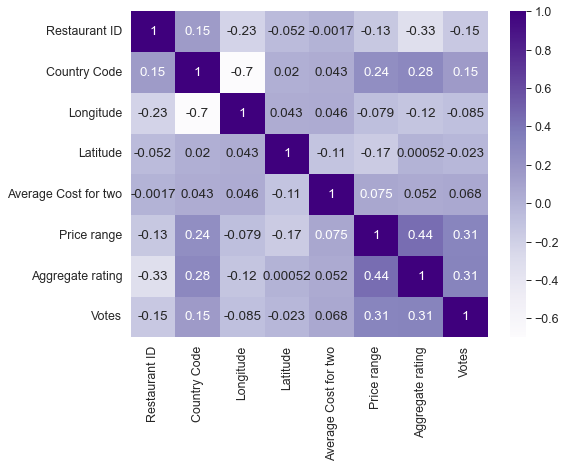

In [14]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)
corrData = zomatoCSV.corr()
sns.heatmap(corrData, annot=True, cmap='Purples')

It looks like there are a few correlations, for example, Aggregate rating and the price range. I wonder how aggreagte ratings look across countries.

<AxesSubplot:xlabel='Country', ylabel='Aggregate rating'>

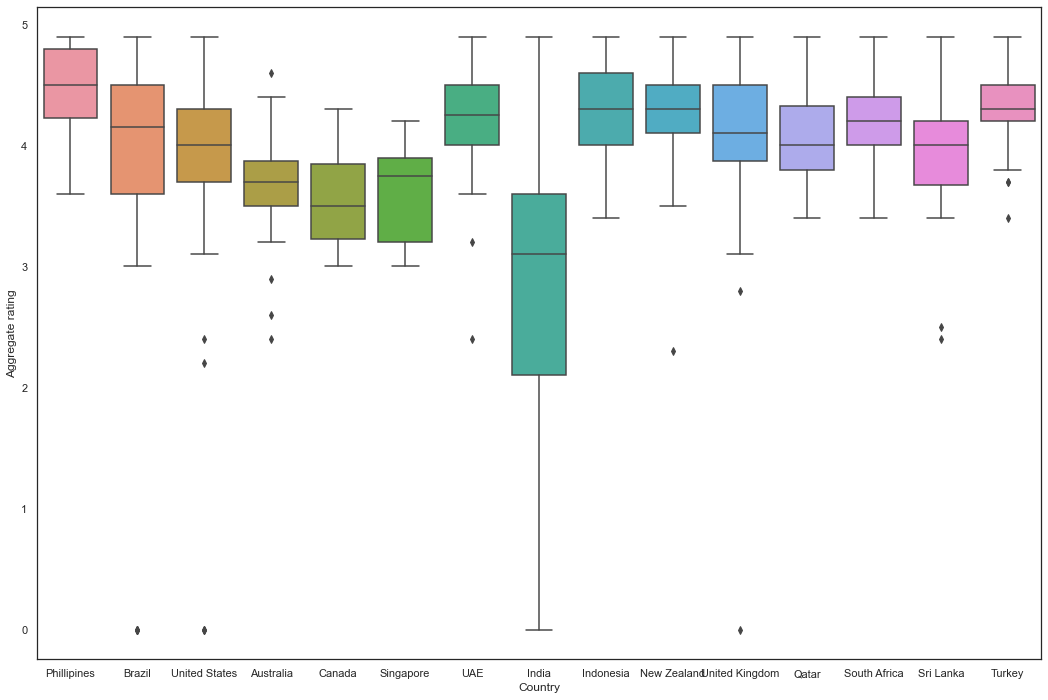

In [146]:
sns.boxplot(data=zomatoCSV,x="Country", y="Aggregate rating")

 It looks like the Philippines is the place to be! I also want to validate that this data set has a good number of votes for India so that I know there is a good sample size.

In [15]:
#Number of votes counted in each country
for index, countryName in enumerate(zomatoCSV["Country"].unique()):
    print( f"""{countryName}: {zomatoCSV[zomatoCSV["Country"].isin([countryName])]["Votes"].sum() }""")

Phillipines: 8963
Brazil: 1177
United States: 185848
Australia: 2674
Canada: 412
Singapore: 638
UAE: 29611
India: 1187163
Indonesia: 16214
New Zealand: 9721
United Kingdom: 16439
Qatar: 3276
South Africa: 18910
Sri Lanka: 2929
Turkey: 14670


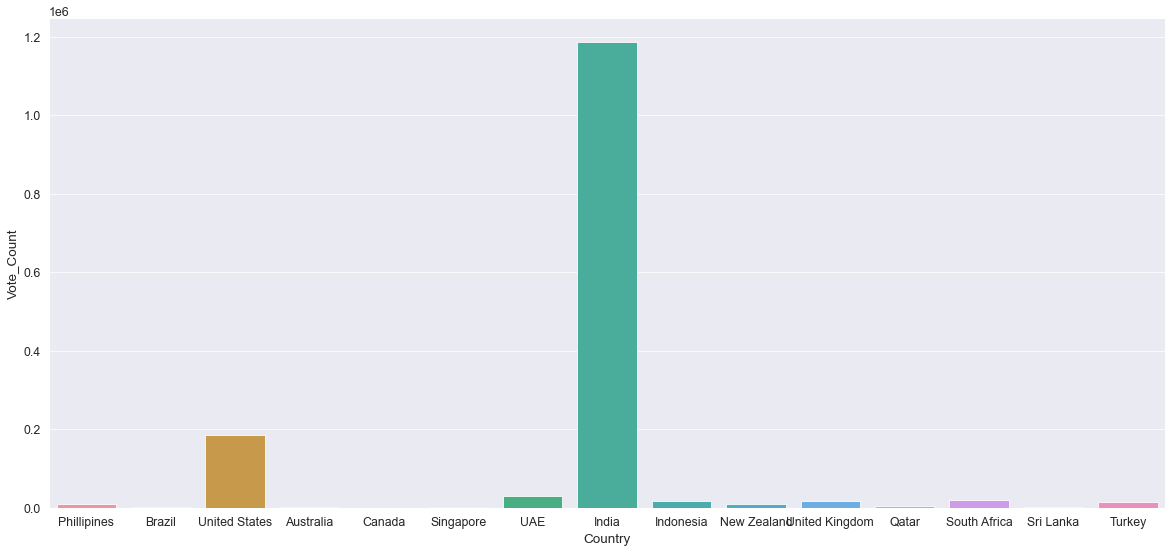

In [16]:
#Converting number of votes counted in each country into a plotable dataframe
country_and_votes = []
for index, countryName in enumerate(zomatoCSV["Country"].unique()):
    country_and_votes.append([ countryName, zomatoCSV[zomatoCSV["Country"].isin([countryName])]["Votes"].sum() ])

country_and_votes = pd.DataFrame(country_and_votes).rename(columns={0: "Country", 1: "Vote_Count"})
country_and_votes

#plotting country_and_votes
plot = sns.barplot(x="Country" , y="Vote_Count", data=country_and_votes, ci=None)

<AxesSubplot:>

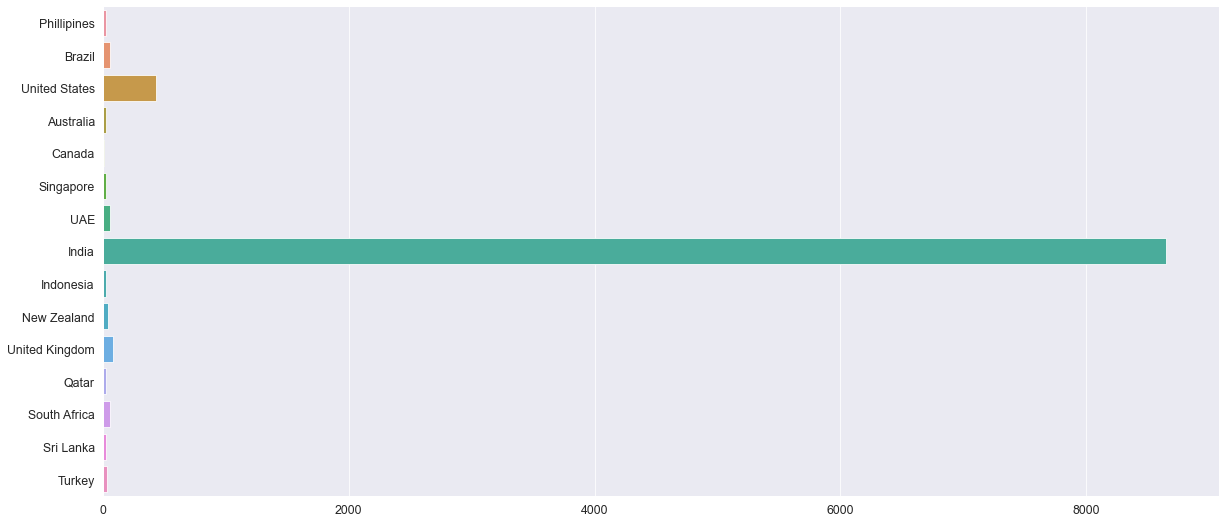

In [17]:
#Counting number of restaurants in each country and plotting them
from collections import Counter
counter = Counter(list(zomatoCSV["Country"]))
y1 = list(counter.keys())
x1 = list(counter.values())
sns.barplot(x = x1, y = y1)

There is an overrepresentation of restaurants and votes from India which will be useful for my research questions. Now that I have a good understanding of my data set I can move on.

# Task 2
## Analysis Pipeline
### Loading Data

In [18]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import folium

#reading in CSVs (Don't need the json data)
zomato_df = pd.read_csv("..\\data\\raw\\zomato.csv" , encoding = "maclatin2")
countryCodes_df = pd.read_excel("..\\data\\raw\\Country-Code.xlsx")

### Cleaning Data


In [19]:
#Drop uneeded columns
zomato_df = zomato_df.drop(["Address","Rating color","Locality","Locality Verbose","Switch to order menu","Restaurant ID"],axis = 'columns')
#Drop rows with missing values
zomato_df = zomato_df.dropna()

### Processing

In [20]:
zomato_df = zomato_df.rename(columns={"Average Cost for two": "Average Cost for Two", 
                          "Has Table booking": "Has Table Booking",
                          "Has Online delivery": "Has Online Delivery",
                          "Rating text": "Rating Text",
                          "Is delivering now": "Is Delivering Now",
                          "Price range": "Price Range",
                          "Aggregate rating": "Aggregate Rating",})


### Wrangling Data

In [21]:
#Merge Tables
zomato_df = zomato_df.merge(countryCodesCSV, how = "inner",on = "Country Code")

#Filtering for just India
zomato_df = zomato_df.query('Country=="India"')

#Change indexing
zomato_df = zomato_df.drop(['Country Code'], axis = 'columns')




# Task 3
## Method Chaining
### Step 1

In [22]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

#Method chain 1 - load in/clean zomato.csv
zomato_df = (
 pd.DataFrame(pd.read_csv("..\\data\\raw\\zomato.csv" , encoding = "maclatin2"))
 .drop(["Address","Rating color","Locality","Locality Verbose","Switch to order menu","Restaurant ID"],axis = 'columns')
 .dropna()
 .rename(columns={"Average Cost for two": "Average Cost for Two", 
                  "Has Table booking": "Has Table Booking",
                  "Has Online delivery": "Has Online Delivery",
                  "Rating text": "Rating Text",
                  "Is delivering now": "Is Delivering Now",
                  "Price Range": "Price Range",
                  "Aggregate rating": "Aggregate Rating",})
)

#Method chain 2 - load in Country-Code.xlsx
country_df = (
    pd.DataFrame(pd.read_excel("..\\data\\raw\\Country-Code.xlsx"))
)

#Method chain 3 - process/wrangle/merge country_df and zomato_df
zomato_cleaned = (
 pd.merge(zomato_df,country_df, how = "inner",on = "Country Code")
 .drop(['Country Code'], axis = 'columns')
 .query('Country=="India"')
)

#Testing output
print(f"Method Chain 1:\n{zomato_df.head()}")
print(f"Method Chain 2:\n{country_df.head()}")
print(f"Method Chain 3:\n{zomato_cleaned.head()}")

Method Chain 1:
          Restaurant Name  Country Code              City   Longitude  \
0        Le Petit Souffle           162       Makati City  121.027535   
1        Izakaya Kikufuji           162       Makati City  121.014101   
2  Heat - Edsa Shangri-La           162  Mandaluyong City  121.056831   
3                    Ooma           162  Mandaluyong City  121.056475   
4             Sambo Kojin           162  Mandaluyong City  121.057508   

    Latitude                          Cuisines  Average Cost for Two  \
0  14.565443        French, Japanese, Desserts                  1100   
1  14.553708                          Japanese                  1200   
2  14.581404  Seafood, Asian, Filipino, Indian                  4000   
3  14.585318                   Japanese, Sushi                  1500   
4  14.584450                  Japanese, Korean                  1500   

           Currency Has Table Booking Has Online Delivery Is Delivering Now  \
0  Botswana Pula(P)              

### Step 2

In [23]:
def clean_and_merge_zomato(zomato_file_path, country_codes_file_path):
    """
    Loads, cleans, processes, and wrangles zomato.csv and Country-Code.xlsx
    
    Arguments:
    zomato_file_path - (str) the file path for the zomato.csv
    
    country_codes_file_path - (str) the file path for the Country-Code.xlsx
    """
    
    #Method chain 1 - load in/clean zomato.csv
    zomato_df = (
     pd.DataFrame(pd.read_csv("..\\data\\raw\\zomato.csv" , encoding = "maclatin2"))
     .drop(["Address","Rating color","Locality","Locality Verbose","Switch to order menu","Restaurant ID"],axis = 'columns')
     .dropna()
     .rename(columns={"Average Cost for two": "Average Cost for Two", 
                      "Has Table booking": "Has Table Booking",
                      "Has Online delivery": "Has Online Delivery",
                      "Rating text": "Rating Text",
                      "Is delivering now": "Is Delivering Now",
                      "Price Range": "Price Range",
                      "Aggregate rating": "Aggregate Rating",})
    )

    #Method chain 2 - load in Country-Code.xlsx
    country_df = (
        pd.DataFrame(pd.read_excel("..\\data\\raw\\Country-Code.xlsx"))
    )

    #Method chain 3 - process/wrangle/merge country_df and zomato_df
    zomato_cleaned = (
     pd.merge(zomato_df,country_df, how = "inner",on = "Country Code")
     .drop(['Country Code'], axis = 'columns')
     .query('Country=="India"')
    )
    
    return zomato_cleaned

In [24]:
#Testing function
test = clean_and_merge_zomato("..\\data\\raw\\zomato.csv","..\\data\\raw\\Country-Code.xlsx")
test

,Restaurant Name,City,Longitude,Latitude,Cuisines,Average Cost for Two,Currency,Has Table Booking,Has Online Delivery,Is Delivering Now,Price range,Aggregate Rating,Rating Text,Votes,Country
615,Jahanpanah,Agra,78.011544,27.161661,"North Indian, Mughlai",850,Indian Rupees(Rs.),No,No,No,3,3.9,Good,140,India
616,Rangrezz Restaurant,Agra,0.000000,0.000000,"North Indian, Mughlai",700,Indian Rupees(Rs.),No,No,No,2,3.5,Good,71,India
617,Time2Eat - Mama Chicken,Agra,78.011608,27.160832,North Indian,500,Indian Rupees(Rs.),No,No,No,2,3.6,Good,94,India
618,Chokho Jeeman Marwari Jain Bhojanalya,Agra,77.998092,27.195928,Rajasthani,400,Indian Rupees(Rs.),No,No,No,2,4.0,Very Good,87,India
619,Pinch Of Spice,Agra,78.007553,27.201725,"North Indian, Chinese, Mughlai",1000,Indian Rupees(Rs.),No,No,No,3,4.2,Very Good,177,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9262,D Cabana,Vizag,83.361377,17.764287,"Continental, Seafood, Chinese, North Indian, B...",600,Indian Rupees(Rs.),No,No,No,2,3.6,Good,193,India
9263,Kaloreez,Vizag,0.000000,0.000000,"Cafe, North Indian, Chinese",400,Indian Rupees(Rs.),No,No,No,2,3.7,Good,85,India
9264,Plot 17,Vizag,83.315281,17.719539,"Burger, Pizza, Biryani",600,Indian Rupees(Rs.),No,No,No,2,4.3,Very Good,172,India
9265,Vista - The Park,Vizag,83.336840,17.721182,"American, North Indian, Thai, Continental",1500,Indian Rupees(Rs.),No,No,No,4,3.8,Good,74,India


### Step 3

In [25]:
#import my function
from project_functions1 import clean_and_merge_zomato
test = clean_and_merge_zomato("..\\data\\raw\\zomato.csv","..\\data\\raw\\Country-Code.xlsx")
test

,Restaurant Name,City,Longitude,Latitude,Cuisines,Average Cost for Two,Currency,Has Table Booking,Has Online Delivery,Is Delivering Now,Price range,Aggregate Rating,Rating Text,Votes,Country
615,Jahanpanah,Agra,78.011544,27.161661,"North Indian, Mughlai",850,Indian Rupees(Rs.),No,No,No,3,3.9,Good,140,India
616,Rangrezz Restaurant,Agra,0.000000,0.000000,"North Indian, Mughlai",700,Indian Rupees(Rs.),No,No,No,2,3.5,Good,71,India
617,Time2Eat - Mama Chicken,Agra,78.011608,27.160832,North Indian,500,Indian Rupees(Rs.),No,No,No,2,3.6,Good,94,India
618,Chokho Jeeman Marwari Jain Bhojanalya,Agra,77.998092,27.195928,Rajasthani,400,Indian Rupees(Rs.),No,No,No,2,4.0,Very Good,87,India
619,Pinch Of Spice,Agra,78.007553,27.201725,"North Indian, Chinese, Mughlai",1000,Indian Rupees(Rs.),No,No,No,3,4.2,Very Good,177,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9262,D Cabana,Vizag,83.361377,17.764287,"Continental, Seafood, Chinese, North Indian, B...",600,Indian Rupees(Rs.),No,No,No,2,3.6,Good,193,India
9263,Kaloreez,Vizag,0.000000,0.000000,"Cafe, North Indian, Chinese",400,Indian Rupees(Rs.),No,No,No,2,3.7,Good,85,India
9264,Plot 17,Vizag,83.315281,17.719539,"Burger, Pizza, Biryani",600,Indian Rupees(Rs.),No,No,No,2,4.3,Very Good,172,India
9265,Vista - The Park,Vizag,83.336840,17.721182,"American, North Indian, Thai, Continental",1500,Indian Rupees(Rs.),No,No,No,4,3.8,Good,74,India


# Task 4

Research Questions: 

1. Where will I find the best restaurants in India? 
1. Which city should I live in to have access to the most good restaurants?
1. Which city is the best on a budget?
1. Which city has the best rating to cost ratio?

## Part 1 
Where will I find the best restaurants in India? 

In [41]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import folium
from project_functions1 import clean_and_merge_zomato

zomato = clean_and_merge_zomato("..\\data\\raw\\zomato.csv","..\\data\\raw\\Country-Code.xlsx")
zomato["Aggregate Rating/Average Cost for Two"] = zomato["Aggregate Rating"]/zomato["Average Cost for Two"]
zomato_agg = zomato[zomato["Rating Text"].isin(["Not rated"]) ==  False]
zomato_agg


,Restaurant Name,City,Longitude,Latitude,Cuisines,Average Cost for Two,Currency,Has Table Booking,Has Online Delivery,Is Delivering Now,Price range,Aggregate Rating,Rating Text,Votes,Country,Aggregate Rating/Average Cost for Two
615,Jahanpanah,Agra,78.011544,27.161661,"North Indian, Mughlai",850,Indian Rupees(Rs.),No,No,No,3,3.9,Good,140,India,0.004588
616,Rangrezz Restaurant,Agra,0.000000,0.000000,"North Indian, Mughlai",700,Indian Rupees(Rs.),No,No,No,2,3.5,Good,71,India,0.005000
617,Time2Eat - Mama Chicken,Agra,78.011608,27.160832,North Indian,500,Indian Rupees(Rs.),No,No,No,2,3.6,Good,94,India,0.007200
618,Chokho Jeeman Marwari Jain Bhojanalya,Agra,77.998092,27.195928,Rajasthani,400,Indian Rupees(Rs.),No,No,No,2,4.0,Very Good,87,India,0.010000
619,Pinch Of Spice,Agra,78.007553,27.201725,"North Indian, Chinese, Mughlai",1000,Indian Rupees(Rs.),No,No,No,3,4.2,Very Good,177,India,0.004200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9262,D Cabana,Vizag,83.361377,17.764287,"Continental, Seafood, Chinese, North Indian, B...",600,Indian Rupees(Rs.),No,No,No,2,3.6,Good,193,India,0.006000
9263,Kaloreez,Vizag,0.000000,0.000000,"Cafe, North Indian, Chinese",400,Indian Rupees(Rs.),No,No,No,2,3.7,Good,85,India,0.009250
9264,Plot 17,Vizag,83.315281,17.719539,"Burger, Pizza, Biryani",600,Indian Rupees(Rs.),No,No,No,2,4.3,Very Good,172,India,0.007167
9265,Vista - The Park,Vizag,83.336840,17.721182,"American, North Indian, Thai, Continental",1500,Indian Rupees(Rs.),No,No,No,4,3.8,Good,74,India,0.002533


I will first analyze which restaruants are the best by aggregate rating. To do this I filtered zomato_agg to not have any rows with a "Not rated" column so I don't consider them in my plots. First I want to see some summary statistics about aggregate ratings in India overall.

In [27]:
zomato_agg.filter(["Aggregate Rating"]).describe()

,Aggregate Rating
count,6513.000000
mean,3.352034
std,0.504689
min,1.800000
25%,3.000000
50%,3.300000
75%,3.700000
max,4.900000


The average rating for a restaurant in India is a 3.35 with highest rating restaurant being 4.9. If you're curious about how Zomato rates restaurants you can read about their normalized 5 point grading system [here](https://www.zomato.com/blog/urbanspoon-to-zomato-the-5-point-rating-system-3). Since 75% of restaurants lie below a rating of 3.7 I will consider restaurants above the 75th quartile good with the best restuarants having a rating equal to the max. Let's see where these restaurants are.

In [109]:
#Filter Restaurants to be above 3.7
goodRests = zomato_agg[zomato_agg["Aggregate Rating"] > 3.7]

#Getting list of longs and lats
longs = goodRests ["Longitude"]
lats = goodRests ["Latitude"]
locationlist = []
for i in range(len(longs)):
    if(lats.iloc[i] != 0 or longs.iloc[i] != 0): #some longs and lats are 0, this is a missing value so exclude these
        locationlist.append([lats.iloc[i],longs.iloc[i]])

#Plot on map
map = folium.Map(location=[20.5937, 78.9629], zoom_start=6)
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup="").add_to(map)
map

Now we can see where the good restuarants are—there's a lot! Feel free to explore the interactive map but make sure to minimize it after to avoid lagging the notebook. Where are the best restaurants?

In [110]:
#Filter Restaurants to be  4.9
bestRests = zomato_agg[zomato_agg["Aggregate Rating"] == 4.9]

#Getting list of longs and lats
longs = bestRests ["Longitude"]
lats = bestRests ["Latitude"]
locationlist = []
for i in range(len(longs)):
    if(lats.iloc[i] != 0 or longs.iloc[i] != 0): #some longs and lats are 0, this is a missing value so exclude these
        locationlist.append([lats.iloc[i],longs.iloc[i]])

#Plot on map
map = folium.Map(location=[20.5937, 78.9629], zoom_start=4)
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup="").add_to(map)
map

We've found them!
## Part 2
Now we know where the best restaurants are in India. However these restaurants are quite spread out. Which city should I live in to have access to the most good restaurants?

<AxesSubplot:xlabel='City', ylabel='Aggregate Rating'>

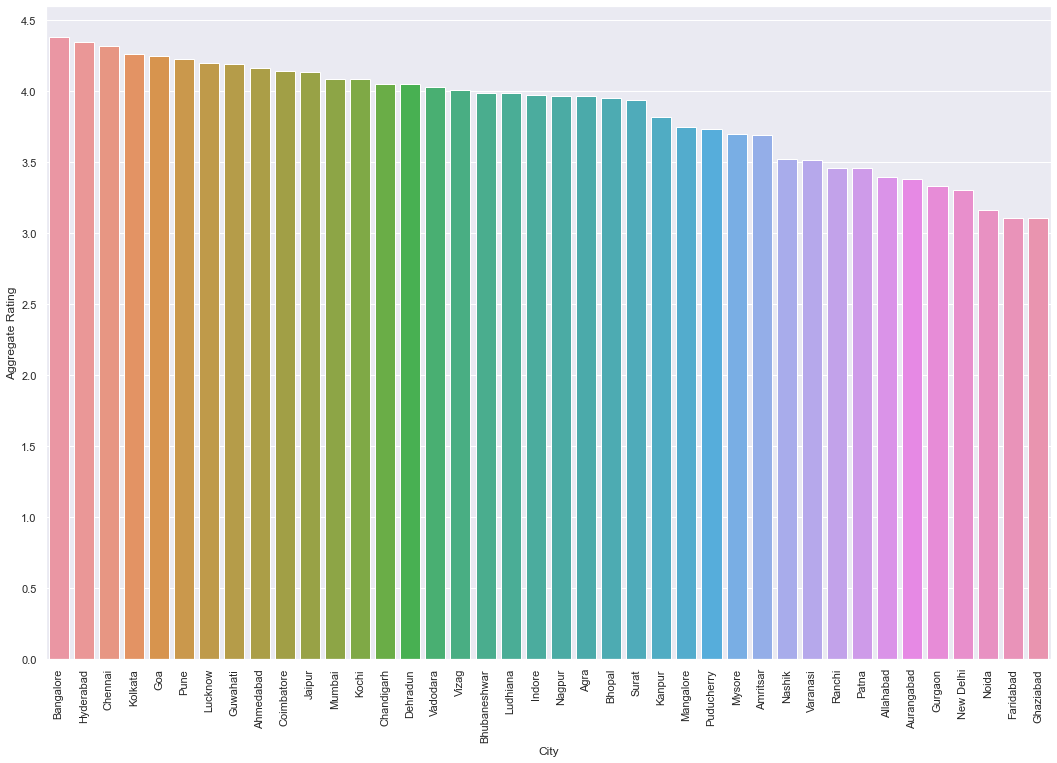

In [47]:

avgRating  = pd.DataFrame(zomato_agg.groupby("City")["Aggregate Rating"].mean())
avgRating  = avgRating.reset_index()
#Don't want to consider these cities because they have very few restaurants
avgRating = avgRating[avgRating["City"].isin(["Mohali","Panchkula","Secunderabad"]) == False]#TODO mention why ur doing this
x = zomato_agg.groupby("City")["Restaurant Name"].count()

#Set window size
sns.set({'figure.figsize':(18,12)})
#Plot
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 5, step=0.5))
sns.color_palette("husl", 8)
sns.barplot(x="City", y="Aggregate Rating", data=avgRating.sort_values(by="Aggregate Rating",ascending = False), ci=None)


It looks like the city with the highest average restaurant ratings is Bangalore, time to pack my bags!
## Part 3
Which city is the best on a budget?

In [37]:
zomato = clean_and_merge_zomato("..\\data\\raw\\zomato.csv","..\\data\\raw\\Country-Code.xlsx")
zomato_price = zomato[zomato["City"].isin(["Mohali","Panchkula","Secunderabad"]) == False]
zomato_price = zomato_price[zomato_price["Average Cost for Two"].isin([0]) ==  False] 
median_Av_Cost = zomato_price.groupby("City").median()
median_Av_Cost = median_Av_Cost.drop(["Price range","Votes","Longitude","Latitude","Aggregate Rating"], axis = "columns")

In [32]:
#Getting data
listCity = median_Av_Cost.index.tolist()
listCost = median_Av_Cost.values.tolist()
listCost
data = []

for i in range(len(listCity)):
    data.append({'id': listCity[i], 'datum': listCost[i][0]})

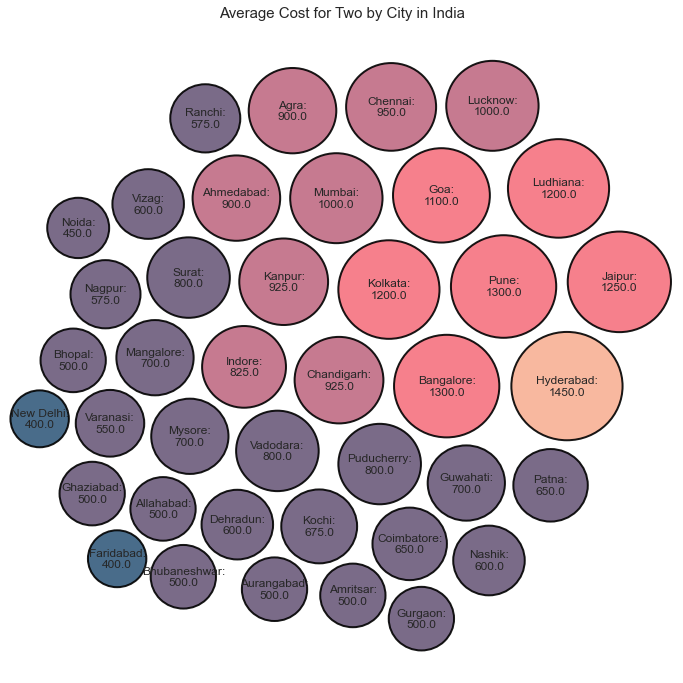

In [48]:
#TODO add legend for color scale

#Getting data
listCity = median_Av_Cost.index.tolist()
listCost = median_Av_Cost.values.tolist()
listCost
data = []

for i in range(len(listCity)):
    data.append({'id': listCity[i], 'datum': listCost[i][0]})
# import the circlify library
import circlify
# Compute circle positions thanks to the circlify() function
circles = circlify.circlify(
    data, 
    show_enclosure=False, 
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)
circles
# import libraries
import circlify
import matplotlib.pyplot as plt

# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(12,12))

# Title
ax.set_title('Average Cost for Two by City in India',fontdict={'fontsize': 15})

# Remove axes
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# Print circle and labels for the highest level:
for circle in circles:
    x, y, r = circle
    label1 = circle.ex["id"]
    label2 = circle.ex["datum"]
    color = '#F8B195'
    if(label2 <= 400):
        color = '#355c7D'
    elif(label2 > 400 and label2 <= 800):
        color = '#6C5B7B'
    elif(label2 > 800 and label2 <= 1000):
        color = '#C06C84'
    elif(label2 > 1000 and label2 <= 1300):
        color = '#F67280'
    elif(label2 > 1200):
        color = '#F8B195'
    ax.add_patch(plt.Circle((x,y), r*0.9, alpha=0.9, linewidth=2, facecolor=color, edgecolor="black"))
    plt.annotate(label1 + ":\n" + str(label2), (x,y ) ,va='center', ha='center')
    
   



It looks like Hyderabad has the highest average cost for two to dine while New Delhi and Faridabad are tied for the cheapest average cost for two to dine. I think I'll be going to New Delhi or Faridabad instead of Hyderabad.
## Part 4
Which city has the best rating to cost ratio?

In [138]:
import plotly.express as px
zomato.groupby("City")["Aggregate Rating/Average Cost for Two"].mean()
zomato_ratio = zomato[zomato["Average Cost for Two"].isin([0]) == False]
forPlot = pd.DataFrame(zomato_ratio.groupby("City")["Aggregate Rating/Average Cost for Two"].mean()).reset_index()
forPlot.head()

,City,Aggregate Rating/Average Cost for Two
0,Agra,0.004435
1,Ahmedabad,0.006020
2,Allahabad,0.007074
3,Amritsar,0.012648
4,Aurangabad,0.006377


First I filter the dataframe so that it has the Ctities and the mean ratio of Aggregate Rating and Average Cost for Two. Next I can plot and compare these ratios with help from [The Python Graph Gallery](https://www.python-graph-gallery.com/circular-barplot-basic).

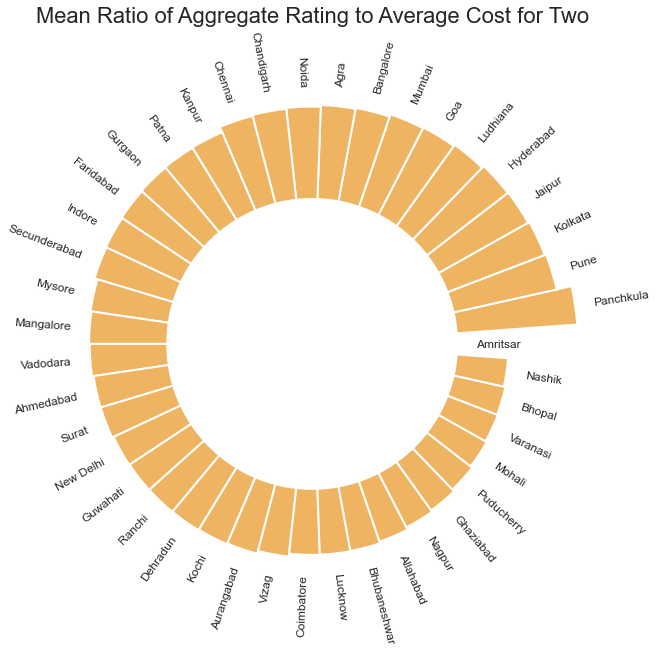

In [144]:
# import pandas for data wrangling
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Build a dataset
df = pd.DataFrame(
        {
            'Name': ['item ' + str(i) for i in list(range(1, 51)) ],
            'Value': np.random.randint(low=10, high=100, size=50)
        })

# Reorder the dataframe
forPlot = forPlot.sort_values(by=['Aggregate Rating/Average Cost for Two'])

# initialize the figure
plt.figure(figsize=(20,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Constants = parameters controling the plot layout:
upperLimit = 100
lowerLimit = 30
labelPadding = 4

# Compute max and min in the dataset
max = forPlot['Aggregate Rating/Average Cost for Two'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * forPlot['Aggregate Rating/Average Cost for Two'] + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(forPlot.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(forPlot.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color="#EEB462",
)

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, forPlot["City"]):
    
    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 

plt.title("Mean Ratio of Aggregate Rating to Average Cost for Two",fontdict={'fontsize':22},y = 1.08)
plt.show()

Overall Panchkula has the highest ratio of aggregate rating to average cost for two. In other words for every dollar spent at a restaurant in Panchukula I will get the highest aggregeate rating. This makes Panchkula a good city to live in if I want the highest meal quality per dollar spent.